In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [12]:
df = pd.read_csv('advertising.csv')
df.shape

(200, 4)

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


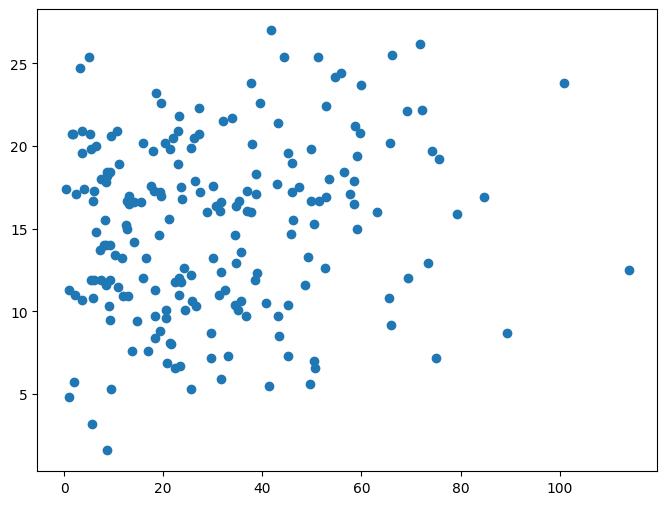

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(df['Newspaper'],df['Sales'])
plt.show()

<AxesSubplot:xlabel='Newspaper'>

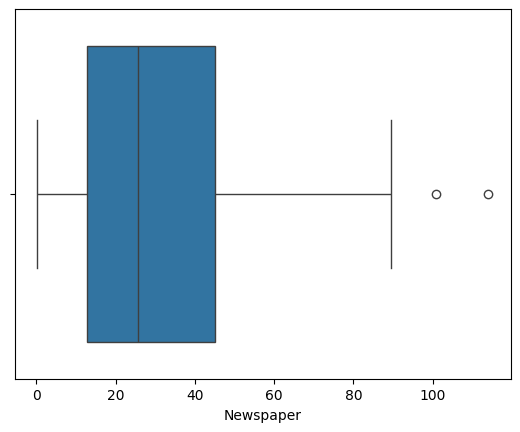

In [8]:
sns.boxplot(x=df['Newspaper'])

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

outliers = (df < lower_threshold) | (df > upper_threshold)

print(outliers.sum())

TV           0
Radio        0
Newspaper    2
Sales        0
dtype: int64


In [16]:
#cleaning the df
df = df[~((df < lower_threshold) | (df > upper_threshold)).any(axis=1)]
df.shape

(198, 4)

<AxesSubplot:xlabel='Newspaper'>

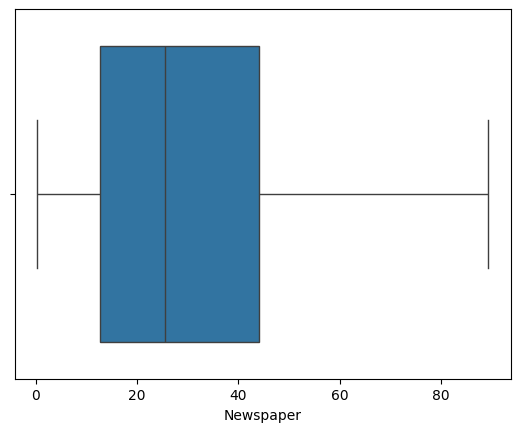

In [18]:
sns.boxplot(x=df['Newspaper'])

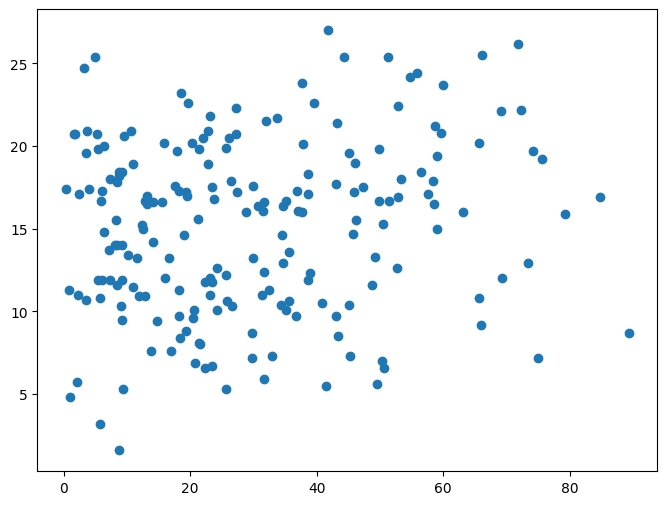

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(df['Newspaper'],df['Sales'])
plt.show()

In [20]:
X=df[['Newspaper']]
y=df['Sales']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [21]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

In [32]:
coefficient = model.coef_
intercept = model.intercept_

mse = metrics.mean_squared_error(y_test,y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)
r2score = metrics.r2_score(y_test,y_pred)
rss = ((y_pred - y_test)**2).sum()

print('Coefficient: ',coefficient)
print(f"Intercept: {intercept}")

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Residual Sum of Squares: {rss}")
print(f"R-Squared Score: {r2score}")

Coefficient:  [0.04705226]
Intercept: 13.761521914426758
Mean Squared Error: 28.681871291369127
Mean Absolute Error: 4.461876087449997
Residual Sum of Squares: 1147.2748516547651
R-Squared Score: -0.03294443032830685


In [33]:
model.score(X_test,y_test)

-0.03294443032830685

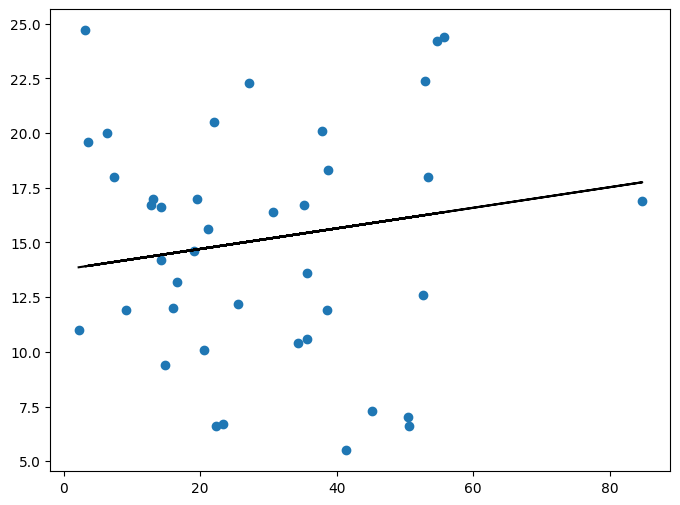

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(X_test,y_test)
plt.plot(X_test.values,y_pred,color='black')
plt.show()